# Polynomial regression

Similar to the Mutiple Linear regression but with one variable with different power on this variable.

<img src="img/formulas.png" width="600" height="300">

We use a polynomial linear regression when a simple or multipe linear regression can't fit every points. 

Instead of fitting points with a straight line we will use a curve.

<img src="img/chart.png" width="600" height="300">

__But why we still call that "linear"?__

Because y is calculated with a linear function of the coefficients. So this is a special case of the __Multiple Linear Regression__

First let's import the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Position_Salaries.csv')
dataset

plt.scatter(dataset['Level'], dataset['Salary'])
plt.show() 


## Example

Let's imagine we are a HR team working for a big company and we want hire a new employee who was earning a big salary (100K) before and wants more for his position.

To check if what he says about his previous salary is true we just have the data above. 

We can see in the scatter that there is no linear relation between these positions levels and the salary.

We want to predict the salary __(Dependent variable vector Y )__ using his position or level __(Independent variables matrix X )__ to see if candidats are bluffing.

First create the matrix and vector

We just need the level (quite equivalent to the position) and the salary.

In [2]:
X = dataset.iloc[:, 1].values
y = dataset.iloc[:, 2].values

X,y

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

There is a problem above because the independent variable X is interpreted as a __vector__. 

And to build a machine learning model we always need a __matrix__ of features. To specify this we need to include add :2 to our selection 

In [3]:
X = dataset.iloc[:, 1:2].values

X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

Because of the small size of the dataset , we won't need to split our dataset into test and train sets.
We need to make a very accurate prediction so we need all the data.

We also don't need to apply Feature Scaling because polynomial regression just consists to add polynomial terms into the multiple linear equation.

We are going to build a Linear and Polynomial regression to compare results.

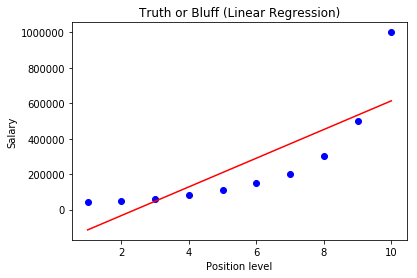

In [4]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

y_predict = lin_reg.predict(X)

# Visualising the Linear Regression results
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_predict , color = 'red')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [5]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

# Creating a object to transform the matrix of features
poly_reg = PolynomialFeatures(degree = 2)

# Creating a new matrix with the dependent variables and powered .
X_poly = poly_reg.fit_transform(X)


np.set_printoptions(formatter={'float': '{: 0.0f}'.format})
X_poly

array([[ 1,  1,  1],
       [ 1,  2,  4],
       [ 1,  3,  9],
       [ 1,  4,  16],
       [ 1,  5,  25],
       [ 1,  6,  36],
       [ 1,  7,  49],
       [ 1,  8,  64],
       [ 1,  9,  81],
       [ 1,  10,  100]])

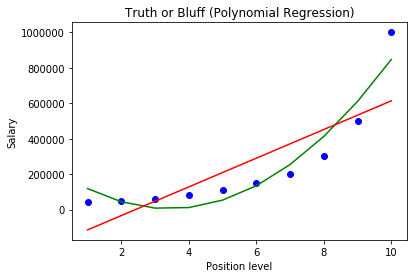

In [6]:
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

y_poly_predict = lin_reg_2.predict(poly_reg.fit_transform(X))

# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_poly_predict, color = 'green')
plt.plot(X, y_predict, color = 'red')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

The simple linear regression prediction line is not fitting the observations points, except for 1 or 2 points. 

If we make a projection using the line the predicted salary will be to high.

With the polynomial regression, we can see that the line is more fitting the obervations points to have a better fit just change the degrees of your polynomial object.

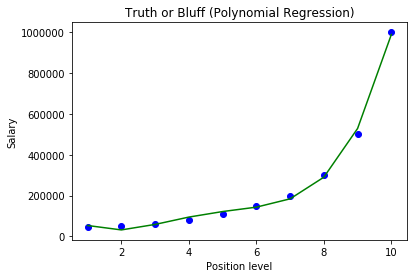

In [7]:
poly_reg = PolynomialFeatures(degree = 4)

X_poly = poly_reg.fit_transform(X)


np.set_printoptions(formatter={'float': '{: 0.0f}'.format})
X_poly

poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

y_poly_predict = lin_reg_2.predict(poly_reg.fit_transform(X))

# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_poly_predict, color = 'green')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

We can also arrange our X matrix to add more accurate steps (1, 1.1, 1.2 ...)

In [8]:
X_grid = np.arange(min(X), max(X), 0.1)

np.set_printoptions(formatter={'float': '{: 0.1f}'.format})

X_grid[:10]

array([ 1.0,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9])

In [9]:
# Transform our vector to a matrix
X_grid = X_grid.reshape((len(X_grid), 1))

X_grid[:10]

array([[ 1.0],
       [ 1.1],
       [ 1.2],
       [ 1.3],
       [ 1.4],
       [ 1.5],
       [ 1.6],
       [ 1.7],
       [ 1.8],
       [ 1.9]])

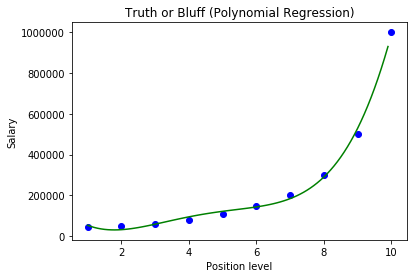

In [10]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
y_poly_shaped = lin_reg_2.predict(poly_reg.fit_transform(X_grid))
plt.scatter(X, y, color = 'blue')
plt.plot(X_grid, y_poly_shaped, color = 'green')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Let's make the predictions for our candidate

In [11]:
candidate_level = 6.5

# Predicting a new result with Linear Regression
linear_result = lin_reg.predict(candidate_level)

# Predicting a new result with Polynomial Regression
poly_result = lin_reg_2.predict(poly_reg.fit_transform(candidate_level))

print('Linear: ' + str(int(linear_result[0])) + '\nPolynomial: ' + str(int(poly_result[0])) )

Linear: 330378
Polynomial: 158862


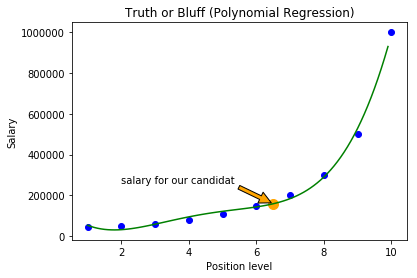

In [12]:
# Visualising the Polynomial Regression results and the prediction for our candidate level
plt.scatter(X, y, color = 'blue')
plt.plot(X_grid, y_poly_shaped, color = 'green')
plt.scatter(candidate_level,poly_result, s=100, color = 'orange')
plt.annotate('salary for our candidat', xy=(candidate_level, poly_result), xytext=(2, poly_result + 100000),
            arrowprops=dict(facecolor='orange', shrink=0.05),
            )
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

The result is __truth__ !!!!